#                     Analyzing Productivity Apps on the Android App Market 

  ###                                           Introduction
                                            
An app is a type of application software designed to run on a mobile device.
This software explicitly bundles certain features in a way that is best accessible to the user.
Apps have become the foundation of the mobile economy, generating billions of dollars in revenue every year.

Many categories of apps have been booming in recent years, and one such vertical includes Productivity applications.

The Google Play Store app data has enormous potential to facilitate data-driven decisions and insights for businesses. 

Many categories of apps have been booming in recent years, and one such vertical includes Productivity applications.
In this notebook, I will analyze  Productivity apps on the Android app market. I will also use user reviews to compare the apps in this category to determine the top 10 productivity apps with the highest average sentiment score. 

#### What is a sentiment score? 
Sentiment score of the user review. It lies between [-1,1]. 
A score such as -1 indicates a negative sentiment.
A score such as 0 indicates a neutral sentiment
A score such as 1 indicates a positive sentiment

#### What is sentiment analysis, and how is it helpful?
* Get a better understanding of how your customers feel about your application
* Gain insights that will help you improve your products and services
* Make your business more responsive to customer feedback
* React quickly to negative sentiment and turn it around
* Monitor your brands reputation in real-time
* Keep your customers happy by always putting their feelings first


#### Details on the data files:
    
    1. apps.csv: contains all the details of around 10,000  apps on Google Play. This includes details on Installs, Reviews, Ratings Pricing etc.

    2. user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed, passed through a sentiment analyzer engine and tagged with its sentiment score.

In [16]:
#Import Pandas
import pandas as pd

#Read the apps.csv data frame
apps= pd.read_csv("apps.csv")
#Look at the first 5 rows of the data frame
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,"June 20, 2018"


In [17]:
#look at  the data type of the columns in the data frame
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   object 
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 679.3+ KB


In [18]:
#Cleaning some characters which are in the column of "Installs" - removing the plus signs

columns = ["Installs"]
cleans = [",", "+"]

for col in columns:
    for cle in cleans:
        apps[col] = apps[col].apply(lambda x: x.replace(cle, ""))
        

apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,"June 20, 2018"


In [19]:
#Converting the data type of Installs column from obj to int
apps["Installs"] = apps["Installs"].astype("int64")

apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   int64  
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 679.3+ KB


In [20]:
#Calculating the number of apps in each category, the average price, and the average rating
app_category_info= apps.groupby("Category", as_index= False).agg({"App": "count", "Price": "mean", "Rating": "mean"})
app_category_info.head()

,Category,App,Price,Rating
0,ART_AND_DESIGN,64,0.093281,4.357377
1,AUTO_AND_VEHICLES,85,0.158471,4.190411
2,BEAUTY,53,0.000000,4.278571
3,BOOKS_AND_REFERENCE,222,0.539505,4.344970
4,BUSINESS,420,0.417357,4.098479


In [11]:
#Transform the orginal name of the columns to more easier names
app_category_info = app_category_info.rename(columns= ({"App": "Number of apps", "Rating": "Average rating", "Price": "Average price"}))
app_category_info

,Category,Number of apps,Average price,Average rating
0,ART_AND_DESIGN,64,0.093281,4.357377
1,AUTO_AND_VEHICLES,85,0.158471,4.190411
2,BEAUTY,53,0.000000,4.278571
3,BOOKS_AND_REFERENCE,222,0.539505,4.344970
4,BUSINESS,420,0.417357,4.098479
5,COMICS,56,0.000000,4.181481
6,COMMUNICATION,315,0.263937,4.121484
7,DATING,171,0.160468,3.970149
8,EDUCATION,119,0.150924,4.364407
9,ENTERTAINMENT,102,0.078235,4.135294


In [21]:
#Filter the specific category which is "PRODUCTIVITY"
apps_productivity = apps[apps["Category"] == "PRODUCTIVITY"]
apps_productivity

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
2716,Microsoft Word,PRODUCTIVITY,4.5,2084126,NaN,500000000,Free,0.0,"July 11, 2018"
2717,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,NaN,10000000,Free,0.0,"August 5, 2018"
2718,Adobe Acrobat Reader,PRODUCTIVITY,4.3,3016297,NaN,100000000,Free,0.0,"April 17, 2018"
2719,"AVG Cleaner – Speed, Battery & Memory Booster",PRODUCTIVITY,4.4,1188154,24.0,10000000,Free,0.0,"June 14, 2018"
2720,Google Drive,PRODUCTIVITY,4.4,2731171,NaN,1000000000,Free,0.0,"August 6, 2018"
...,...,...,...,...,...,...,...,...,...
9431,Fort Myers FL,PRODUCTIVITY,NaN,0,22.0,100,Free,0.0,"September 17, 2015"
9447,MY GULFPORT FL,PRODUCTIVITY,NaN,0,49.0,50,Free,0.0,"May 18, 2018"
9504,Future Cloud,PRODUCTIVITY,4.6,1075,NaN,100000,Free,0.0,"January 22, 2018"
9589,FQ METER,PRODUCTIVITY,3.9,17,2.4,1000,Free,0.0,"April 23, 2017"


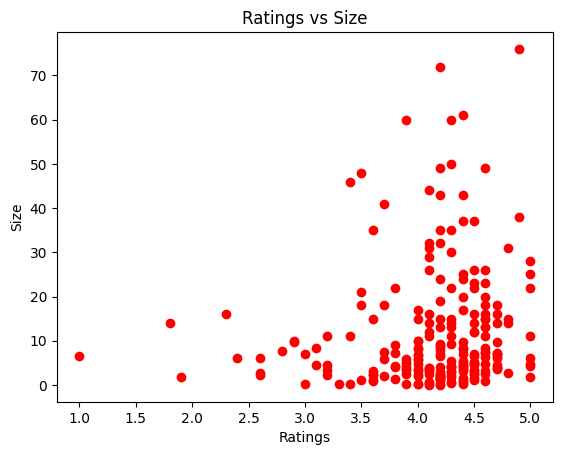

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_installs_and_rating_present = apps_productivity[(~apps_productivity['Rating'].isnull()) & (~apps_productivity['Size'].isnull())]


# Plot Ratings vs Size
plt.scatter( apps_with_installs_and_rating_present['Rating'],apps_with_installs_and_rating_present['Size'],c="Red")
plt.title("Ratings vs Size")
plt.xlabel("Ratings")
plt.ylabel("Size")
plt.show()


#### Is there a correlation between ratings and the size of the application?

As we can see above, all of the highly rated apps have a smaller size.
<ul>
Possible reasons for this include the following:
    
   <li><b>Data consumption</b>- 
       Larger the application is, the more likely the data consumption of the application may be higher as well. Many times, users cannot experience and utilize some of the high-end functionalities of a mobile app since it requires more data consumption, and the low-bandwidth app needs to function better due to its enormous app size.
   <li><b>Phone storage takes a hit</b>-  
       Bigger app size takes up more storage space on your mobile or tab.In todays day and age, most people would like to have the luxury of downloading many applications. This is not possible if each app size is big, hence is much more advantageous to customers if the app sizes are smaller
</ul>    

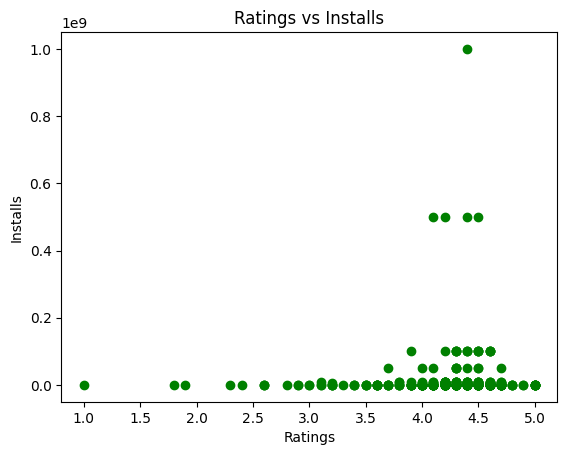

In [23]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Select rows where both 'Rating' and 'Installs' values are present (ie. the two values are not null)
apps_with_installs_and_rating_present = apps_productivity[(~apps_productivity['Rating'].isnull()) & (~apps_productivity['Installs'].isnull())]


# Plot Ratings vs Installs
plt.scatter( apps_with_installs_and_rating_present['Rating'],apps_with_installs_and_rating_present['Installs'],c="Green")
plt.title("Ratings vs Installs")
plt.xlabel("Ratings")
plt.ylabel("Installs")
plt.show()

Here, we cannot determine a concrete relationship between Ratings and Installs

In [27]:
#read second csv file which has user reviews was named as "user reviews"
user_reviews= pd.read_csv("user_reviews.csv")
#Let we look the first 5 rows of the data frame
user_reviews.head()

,App,Review,Sentiment Category,Sentiment Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40
4,10 Best Foods for You,Best idea us,Positive,1.00


In [25]:
#read second csv file which has user reviews was named as "user reviews"
user_reviews= pd.read_csv("user_reviews.csv")
#Let we look the first 5 rows of the data frame
user_reviews.head()

,App,Review,Sentiment Category,Sentiment Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40
4,10 Best Foods for You,Best idea us,Positive,1.00


In [28]:
#Let we look the data type of the columns of the data frame
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 64295 non-null  object 
 1   Review              37427 non-null  object 
 2   Sentiment Category  37432 non-null  object 
 3   Sentiment Score     37432 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [32]:
#Merge two csv file in order to create ordered data frame which has the columns of Apps and Sentiment Scores
merged_df = apps_productivity.merge(user_reviews, on= "App", how= "inner")
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Review,Sentiment Category,Sentiment Score
0,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,NaN,10000000,Free,0.0,"August 5, 2018",The pop-up ads reminders annoying distracting....,Negative,-0.400000
1,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,NaN,10000000,Free,0.0,"August 5, 2018",I wanted deny autostart several applications (...,Neutral,0.000000
2,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,NaN,10000000,Free,0.0,"August 5, 2018",The works well. Been using years. I bought pro...,Negative,-0.400000
3,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,NaN,10000000,Free,0.0,"August 5, 2018",I've using years love it. I'd recommend anyone...,Positive,0.375000
4,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,NaN,10000000,Free,0.0,"August 5, 2018",One complaint I beta user get new phone. After...,Negative,-0.009091
...,...,...,...,...,...,...,...,...,...,...,...,...
2755,AutoCAD - DWG Viewer & Editor,PRODUCTIVITY,4.2,145088,24.0,10000000,Free,0.0,"July 23, 2018",This AutoCAD good . But options missing measur...,Positive,0.250000
2756,AutoCAD - DWG Viewer & Editor,PRODUCTIVITY,4.2,145088,24.0,10000000,Free,0.0,"July 23, 2018",Not free. Just want viewer,Negative,-0.200000
2757,AutoCAD - DWG Viewer & Editor,PRODUCTIVITY,4.2,145088,24.0,10000000,Free,0.0,"July 23, 2018",Does 3D one?,Neutral,0.000000
2758,AutoCAD - DWG Viewer & Editor,PRODUCTIVITY,4.2,145088,24.0,10000000,Free,0.0,"July 23, 2018",NaN,NaN,NaN


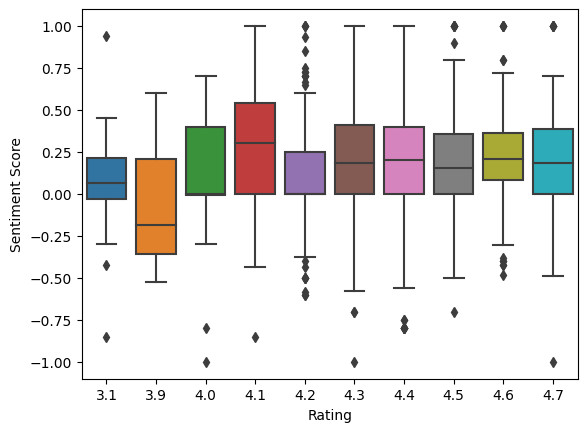

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
# User review sentiment polarity for each rating
sns.boxplot(x="Rating", y="Sentiment Score",data=merged_df)
plt.show()



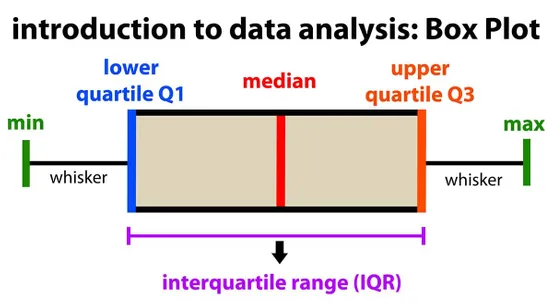

### Minimum Score
The lowest score, excluding outliers (shown at the end of the left whisker).
### Lower Quartile
Twenty-five percent of scores fall below the lower quartile value (also known as the first quartile).
### Median
The median marks the mid-point of the data and is shown by the line that divides the box into two parts (sometimes known as the second quartile). Half the scores are greater than or equal to this value and half are less.
### Upper Quartile
Seventy-five percent of the scores fall below the upper quartile value (also known as the third quartile). Thus, 25% of data are above this value.
### Maximum Score
The highest score, excluding outliers (shown at the end of the right whisker).
### Whiskers
The upper and lower whiskers represent scores outside the middle 50% (i.e. the lower 25% of scores and the upper 25% of scores).
### The Interquartile Range (or IQR)
This is the box plot showing the middle 50% of scores (i.e., the range between the 25th and 75th percentile).

From the data generated above,<b> we can see that apps with higher ratings tend to have a positive sentiment score </b>.<br>
Especially ranging from Ratings 4.1 to 4.7<br>
On the other hand,higher rated apps do have their fair share of negative senitiment scores, but the majority ends up to be a positive sentiment score

In [41]:
#Calculate the average sentiment score
app_sentiment_score= merged_df.groupby("App", as_index= False).agg({"Sentiment Score":"mean"})
app_sentiment_score.head()


,App,Sentiment Score
0,7 Weeks - Habit & Goal Tracker,0.142820
1,ASUS Calling Screen,0.063164
2,ASUS Quick Memo,0.029167
3,ASUS SuperNote,0.192791
4,"AVG Cleaner – Speed, Battery & Memory Booster",0.273664


In [46]:
#sort the sentiment scores with descending False in order to sort the scores from high to low
app_sentiment_score_sorted = app_sentiment_score.sort_values("Sentiment Score", ascending= False)
app_sentiment_score_sorted.head()

,App,Sentiment Score
41,Google Slides,0.933333
28,Easy Voice Recorder,0.435837
17,Calendar+ Schedule Planner App,0.319071
30,Fake Call - Fake Caller ID,0.297794
33,G Cloud Backup,0.284192


In [47]:
#Print the 10 apps which have the higher score with head() function
top_10_user_feedback= app_sentiment_score_sorted.head(10)
top_10_user_feedback

,App,Sentiment Score
41,Google Slides,0.933333
28,Easy Voice Recorder,0.435837
17,Calendar+ Schedule Planner App,0.319071
30,Fake Call - Fake Caller ID,0.297794
33,G Cloud Backup,0.284192
20,ColorNote Notepad Notes,0.275655
4,"AVG Cleaner – Speed, Battery & Memory Booster",0.273664
7,"All-In-One Toolbox: Cleaner, Booster, App Manager",0.267335
45,Hacker's Keyboard,0.261372
32,File Explorer,0.259583


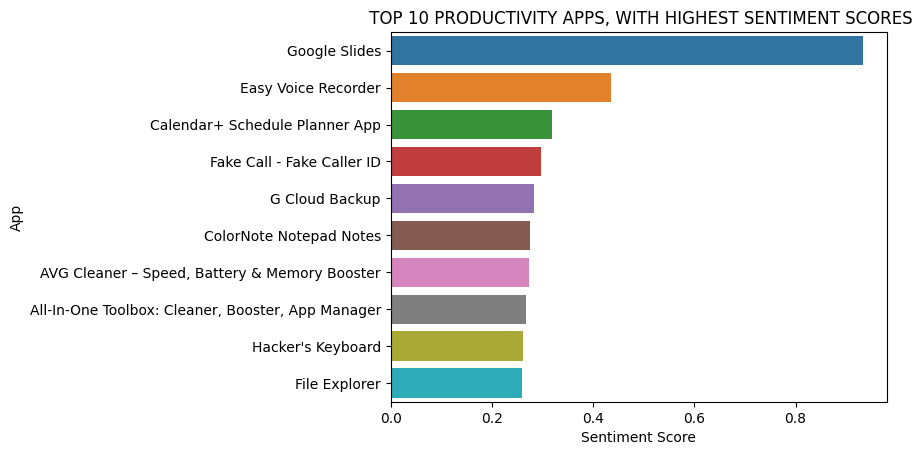

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="Sentiment Score", y="App",data=top_10_user_feedback)
plt.title (" TOP 10 PRODUCTIVITY APPS, WITH HIGHEST SENTIMENT SCORES")
plt.show()
